<a href="https://colab.research.google.com/github/subho7003/Cancer-prediction/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/cancer_data.csv")
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [ ]:
data_final=data.drop(['Unnamed: 32','id'],axis=1)
print(data_final)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [ ]:
data_final["diagnosis"]=data_final["diagnosis"].map({"M":1,"B":0})
print(data_final)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010  

<Axes: >

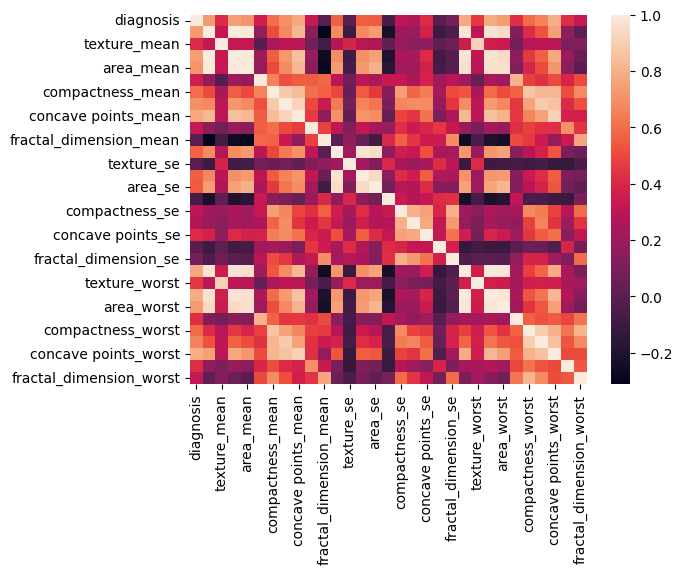

In [ ]:
sns.heatmap(data_final.corr())

In [ ]:
x=data_final.drop(columns=["diagnosis"])
y=data_final["diagnosis"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
logm=LogisticRegression()
logm.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logm.score(x_train,y_train)

0.9516483516483516

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(y_test,logm.predict(x_test))
print(ac)


0.9473684210526315


<Axes: >

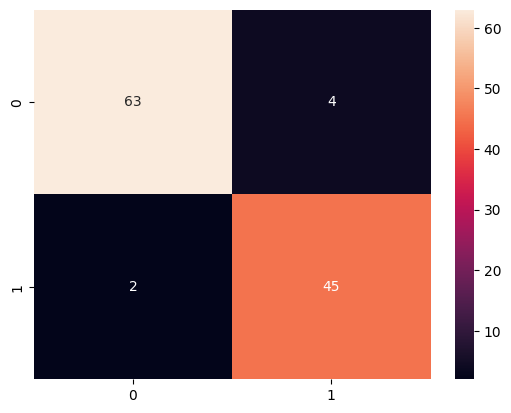

In [ ]:
sns.heatmap(confusion_matrix(y_test,logm.predict(x_test)),annot=True)

In [ ]:
logm_cr=classification_report(y_test,logm.predict(x_test))
print(logm_cr)


              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
acknn=accuracy_score(y_test,knn.predict(x_test))
print(acknn)

0.9649122807017544


<Axes: >

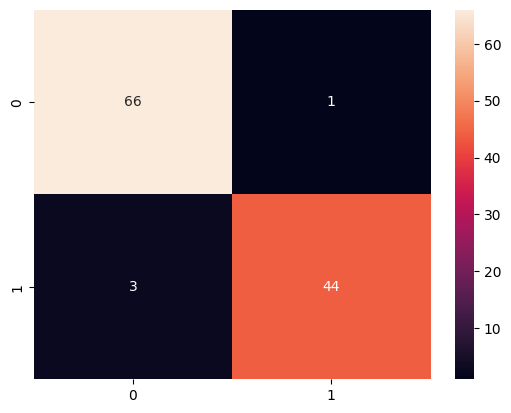

In [ ]:
sns.heatmap(confusion_matrix(y_test,knn.predict(x_test)),annot=True)

In [ ]:
crknn=classification_report(y_test,knn.predict(x_test))
print(crknn)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
acnb=accuracy_score(y_test,nb.predict(x_test))
print(acnb)

0.9298245614035088


<Axes: >

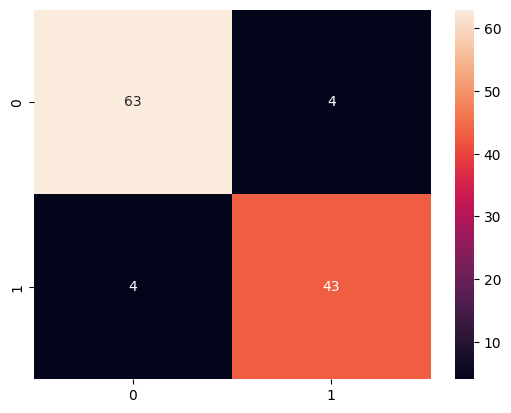

In [ ]:
sns.heatmap(confusion_matrix(y_test,nb.predict(x_test)),annot=True)

In [ ]:
crnb=classification_report(y_test,nb.predict(x_test))
print(crnb)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



**SUPPORT VECTOR MACHINE(SVM)**

In [ ]:
from sklearn.svm import SVC
svmmodel=SVC(kernel="linear")
svmmodel.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
acsvm=accuracy_score(y_test,svmmodel.predict(x_test))
print(acsvm)

0.956140350877193


<Axes: >

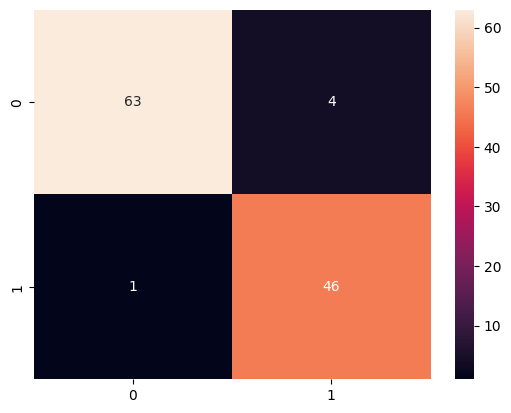

In [ ]:
sns.heatmap(confusion_matrix(y_test,svmmodel.predict(x_test)),annot=True)


In [ ]:
crnb=classification_report(y_test,svmmodel.predict(x_test))
print(crnb)


              precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



**DECISION TREE(DT)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
acdt=accuracy_score(y_test,dt.predict(x_test))
print(acdt)

0.9122807017543859


<Axes: >

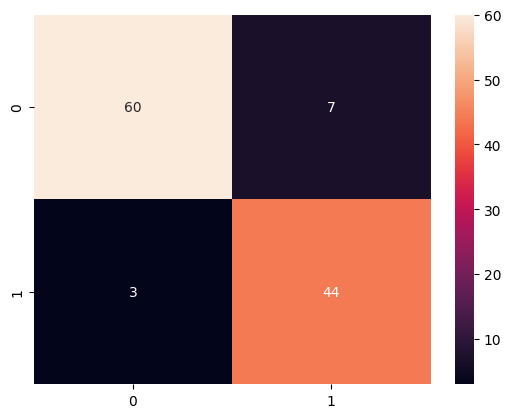

In [ ]:
sns.heatmap(confusion_matrix(y_test,dt.predict(x_test)),annot=True)

In [ ]:
crdt=classification_report(y_test,dt.predict(x_test))
print(crdt)


              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.86      0.94      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
acrf=accuracy_score(y_test,rf.predict(x_test))
print(acrf)

0.956140350877193


<Axes: >

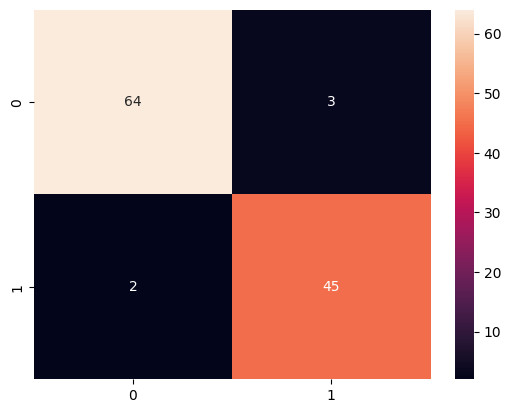

In [ ]:
sns.heatmap(confusion_matrix(y_test,rf.predict(x_test)),annot=True)

In [ ]:
crrf=classification_report(y_test,rf.predict(x_test))
print(crrf)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

